## Problem statement

BigMart's data scientists have gathered 2013 sales information for 1559 goods from 10 shops located in various cities. Additionally stated are the characteristics of each product and retailer.

This data science project aims to create a prediction model and determine each product's sales at a certain retailer.

With the help of this model, BigMart will attempt to comprehend the characteristics of the goods and the shops that are essential to boosting sales.

## Hypothesis Generation 


In any machine learning process, this step is crucial.
Basically, it is brainstorming and generating as many thoughts as you can concerning potential influences on the goal variable.
It enables us to more effectively and efficiently explore the data at hand.
Before viewing the data, we should generate hypotheses to avoid creating biassed hypotheses.
The theories based on the problem statement are listed below.

1. Weekends are when sales are highest.
2. Increased sales in the early morning and late at night.
3. Increased revenues at the year's conclusion.
4. Shop size has an impact on sales.
5. The store's location has an impact on sales.
6. Goods that have greater shelf space sell better.

##  Loading Packages 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Loading the Dataset

In [3]:
df=pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##  Exploratory Data Analysis

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Missing Value Treatment

In [ ]:
#Replacing NULL values in Numerical columns using Median
#Replacing NULL values in Categoical columns using Mode
df.fillna(value=df['Item_Weight'].median(),inplace =True)
df.fillna(value=df['Outlet_Size'].mode(),inplace =True)

In [11]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
df.duplicated().sum()

0

## Using the boxplot to check outliers 

<AxesSubplot:>

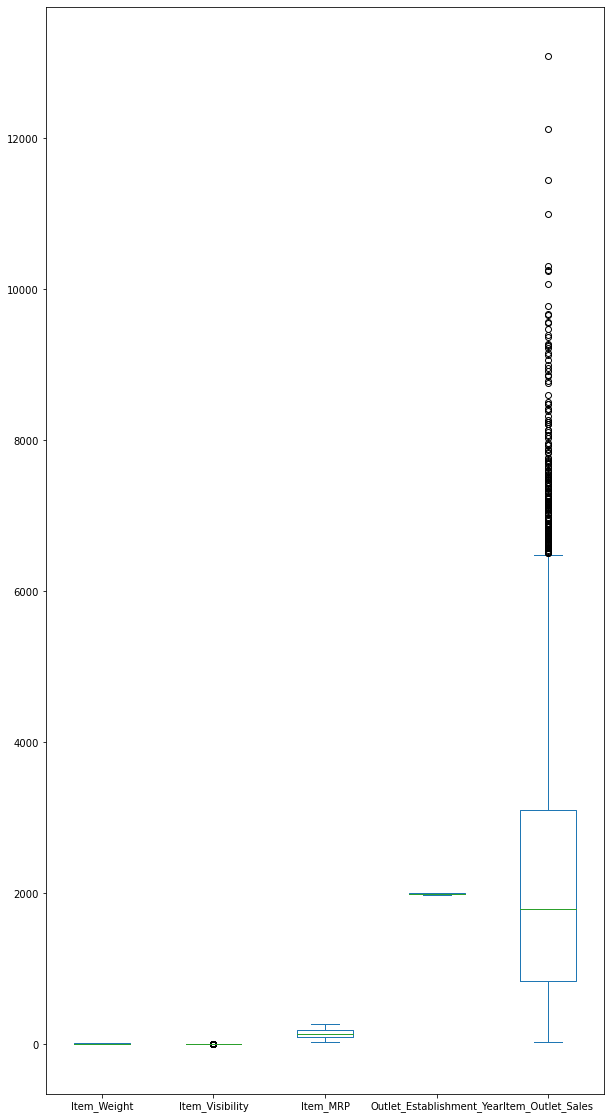

In [15]:
df.plot(kind='box',figsize=(10,20))

<AxesSubplot:xlabel='Item_Weight'>

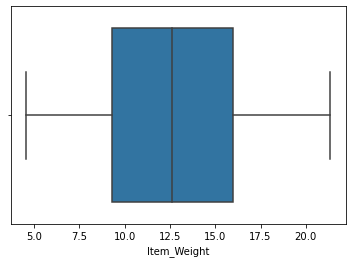

In [16]:
sns.boxplot(x=df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility'>

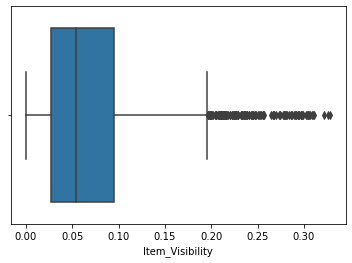

In [17]:
sns.boxplot(x=df['Item_Visibility'])

## Removing outliers using IQR

<AxesSubplot:xlabel='Item_Visibility'>

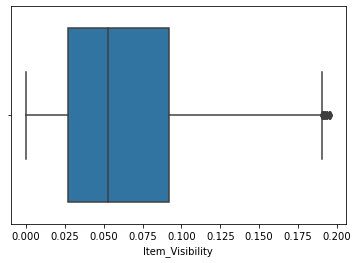

In [18]:
Q1=df['Item_Visibility'].quantile(.25)
Q3=df['Item_Visibility'].quantile(.75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
HL=Q3+(1.5*IQR)
data_no_outliers=df[(df['Item_Visibility']>LL)&(df['Item_Visibility']<HL)]
sns.boxplot(x=data_no_outliers['Item_Visibility']) 

<AxesSubplot:xlabel='Item_MRP'>

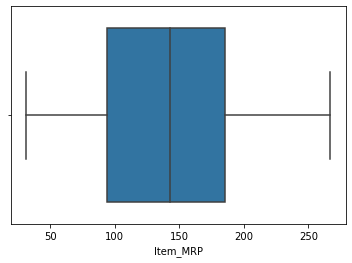

In [19]:
sns.boxplot(x=df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

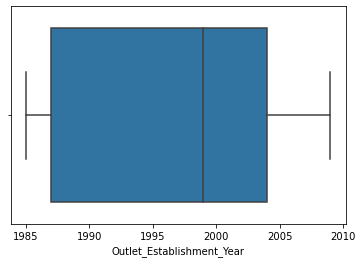

In [20]:
sns.boxplot(x=df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

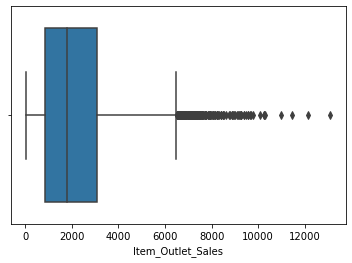

In [21]:
sns.boxplot(x=df['Item_Outlet_Sales'])

## Removing outliers using IQR

<AxesSubplot:xlabel='Item_Outlet_Sales'>

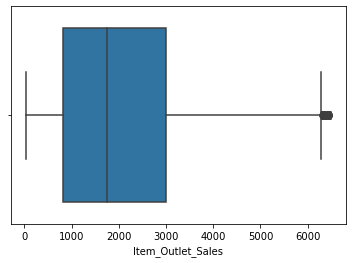

In [22]:
Q1=df['Item_Outlet_Sales'].quantile(.25)
Q3=df['Item_Outlet_Sales'].quantile(.75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
HL=Q3+(1.5*IQR)
data_no_outliers=df[(df['Item_Outlet_Sales']>LL)&(df['Item_Outlet_Sales']<HL)]
sns.boxplot(x=data_no_outliers['Item_Outlet_Sales']) 

In [23]:
df1=df.copy()

## Getting the profile report for feature engineering

In [24]:
import pandas as pd
import pandas_profiling as pp

In [25]:
profile = pp.ProfileReport(df)
profile.to_file("output1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,12.6,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Checking the distribution of 'Item_Outlet_Sales' column

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

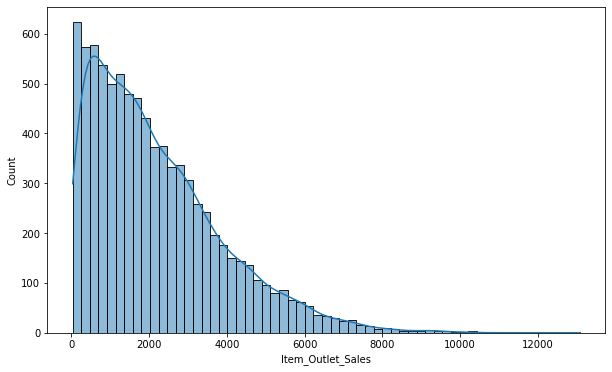

In [92]:
plt.figure(figsize = (10,6))
sns.histplot(data = df1, x = 'Item_Outlet_Sales', kde = True)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

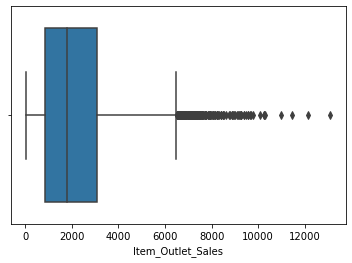

In [94]:
sns.boxplot(x=df1['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

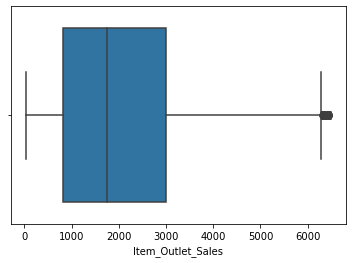

In [95]:
Q1=df['Item_Outlet_Sales'].quantile(.25)
Q3=df['Item_Outlet_Sales'].quantile(.75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
HL=Q3+(1.5*IQR)
data_no_outliers=df[(df['Item_Outlet_Sales']>LL)&(df['Item_Outlet_Sales']<HL)]
sns.boxplot(x=data_no_outliers['Item_Outlet_Sales']) 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

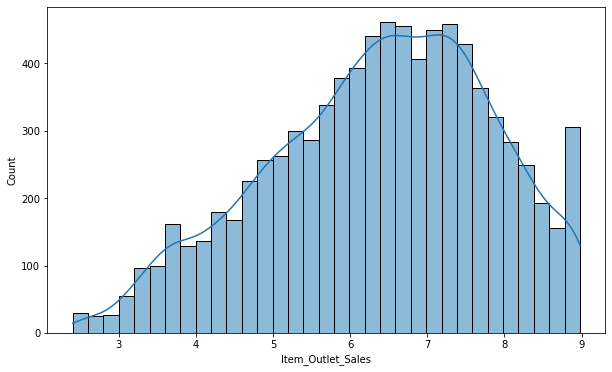

In [106]:
## Function for fixing positive skewness
def sqrt_transformation(dataframe):
    return np.sqrt(dataframe)
df1['Item_Outlet_Sales'] = df1['Item_Outlet_Sales'].map(sqrt_transformation)
# After fixing skewness

plt.figure(figsize = (10,6))
sns.histplot(data = df1, x = 'Item_Outlet_Sales', kde = True)

In [114]:
categorical_train = df1.select_dtypes(include = 'object')
numerical_train= df1.select_dtypes(exclude = 'object')
print(f"There are {len(categorical_train.columns)} Categorical Attributes")
print(f"There are {len(numerical_train.columns)} Numerical Attributes")

There are 7 Categorical Attributes
There are 5 Numerical Attributes


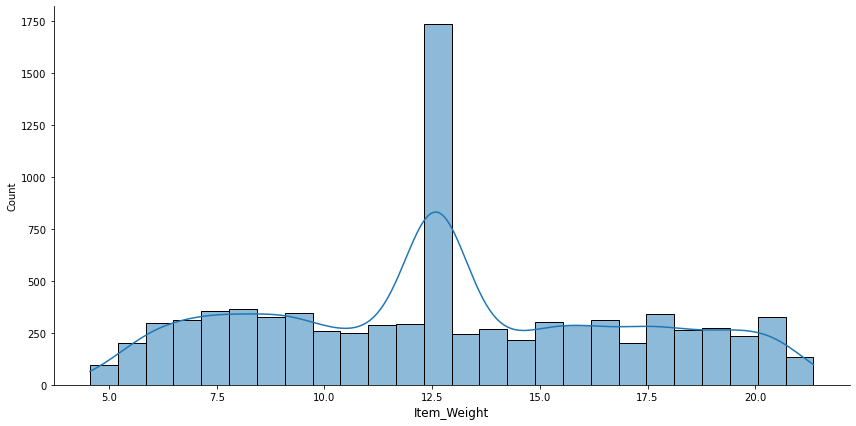

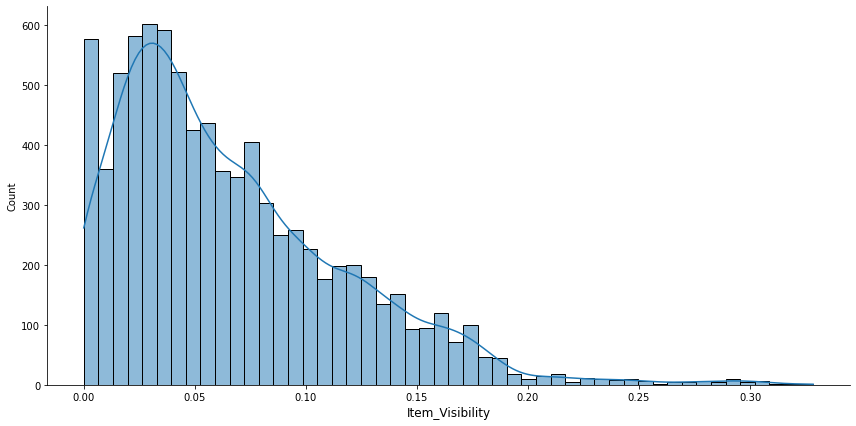

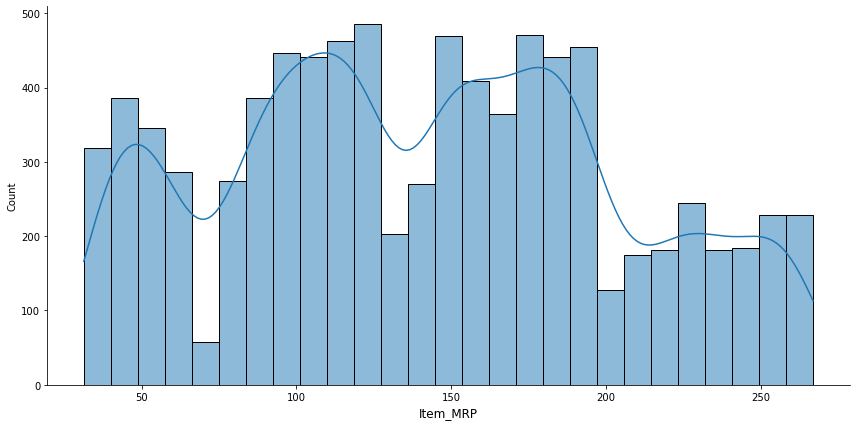

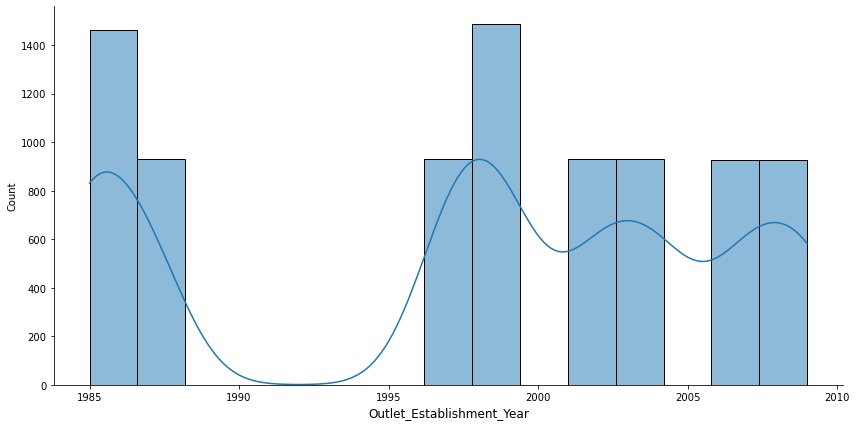

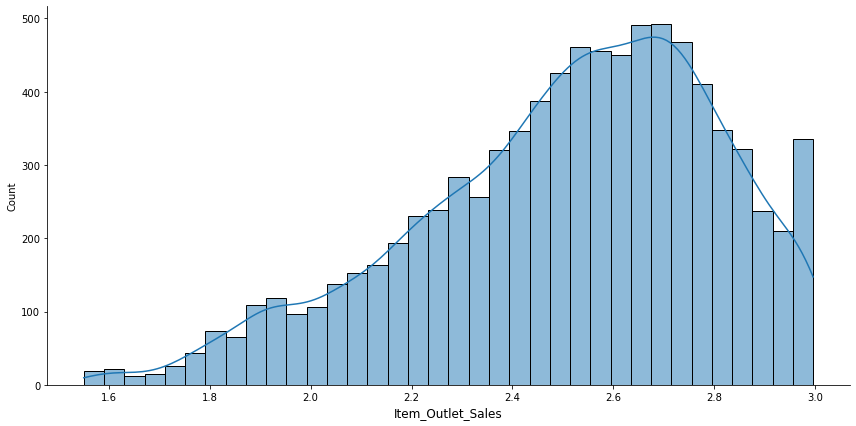

In [116]:
for i in numerical_train:
    sns.displot(data = df1, x = i, kde = True, aspect = 2, height = 6)
    plt.xlabel(i, fontsize = 12) 

<AxesSubplot:ylabel='Item_Weight'>

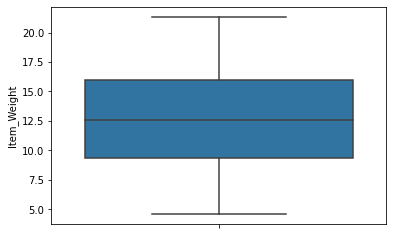

In [117]:
sns.boxplot(y=df1["Item_Weight"])

<AxesSubplot:xlabel='Item_Visibility'>

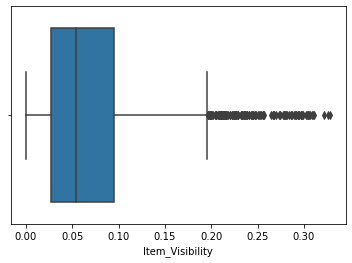

In [120]:
sns.boxplot(x=df1['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility'>

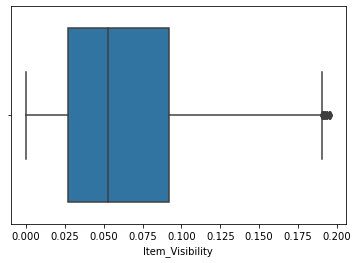

In [121]:
Q1=df['Item_Visibility'].quantile(.25)
Q3=df['Item_Visibility'].quantile(.75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
HL=Q3+(1.5*IQR)
data_no_outliers=df[(df['Item_Visibility']>LL)&(df['Item_Visibility']<HL)]
sns.boxplot(x=data_no_outliers['Item_Visibility']) 

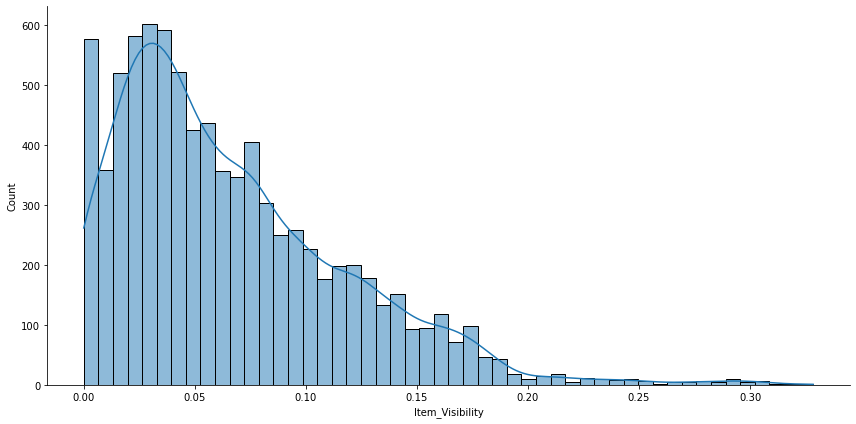

In [122]:
sns.displot(data = df1, x = 'Item_Visibility', kde = True, aspect = 2, height = 6)

## After remvoing skewness and fixing outliers on trainset

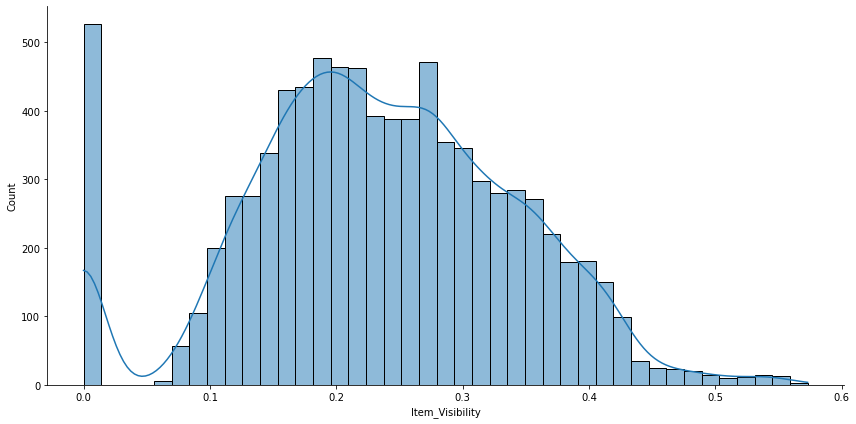

In [123]:
df1['Item_Visibility'] = df1["Item_Visibility"].map(sqrt_transformation)
# After remvoing skewness and fixing outliers on trainset

sns.displot(x = 'Item_Visibility', data = df1, aspect = 2, height = 6, kde = True)

## value of skewness and  Kurtosis

In [125]:
for i in numerical_train:
    print("\n")
    print(i)
    print("-" * 20)
    print("Skewness: %f" % df1[i].skew())
    print("Kurtosis: %f" % df1[i].kurt())
    print("-" * 20)



Item_Weight
--------------------
Skewness: 0.121845
Kurtosis: -0.858109
--------------------


Item_Visibility
--------------------
Skewness: -0.098056
Kurtosis: -0.036927
--------------------


Item_MRP
--------------------
Skewness: 0.127202
Kurtosis: -0.889769
--------------------


Outlet_Establishment_Year
--------------------
Skewness: -0.396641
Kurtosis: -1.205694
--------------------


Item_Outlet_Sales
--------------------
Skewness: -0.611332
Kurtosis: -0.124804
--------------------


In [126]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,2.796007
1,DRC01,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,2.142162
2,FDN15,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2.601398
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,12.6,Tier 3,Grocery Store,2.280825
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,2.369801


## Dropping of columns

In [127]:
df1.drop(columns='Item_Identifier',inplace=True)
df1.drop(columns='Outlet_Identifier',inplace=True)
df1.drop(columns='Outlet_Type',inplace=True)
df1.drop(columns='Outlet_Establishment_Year',inplace=True)
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.126678,Dairy,249.8092,Medium,Tier 1,2.796007
1,5.920,Regular,0.138846,Soft Drinks,48.2692,Medium,Tier 3,2.142162
2,17.500,Low Fat,0.129461,Meat,141.6180,Medium,Tier 1,2.601398
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,12.6,Tier 3,2.280825
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,2.369801
...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.238293,Snack Foods,214.5218,High,Tier 3,2.694474
8519,8.380,Regular,0.216754,Baking Goods,108.1570,12.6,Tier 2,2.200264
8520,10.600,Low Fat,0.187580,Health and Hygiene,85.1224,Small,Tier 2,2.424294
8521,7.210,Regular,0.381078,Snack Foods,103.1332,Medium,Tier 3,2.560160


### Encoding Categorical Variables


1). Label encoding simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.
2). In One hot encoding, each category of a categorical variable is converted into a new binary column (1/0).

In [128]:
df1=pd.get_dummies(df1,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type'],drop_first=True)

In [129]:
df1

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.300,0.126678,249.8092,2.796007,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5.920,0.138846,48.2692,2.142162,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,17.500,0.129461,141.6180,2.601398,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,19.200,0.000000,182.0950,2.280825,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.930,0.000000,53.8614,2.369801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.238293,214.5218,2.694474,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
8519,8.380,0.216754,108.1570,2.200264,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8520,10.600,0.187580,85.1224,2.424294,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8521,7.210,0.381078,103.1332,2.560160,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


##  Independent variables

In [135]:
x=df1.loc[:,['Item_Weight', 'Item_Visibility', 'Item_MRP', 
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3']]
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.30,0.126678,249.8092,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5.92,0.138846,48.2692,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,17.50,0.129461,141.6180,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,19.20,0.000000,182.0950,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.93,0.000000,53.8614,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## dependent variable 

In [136]:
y=df1.loc[:,['Item_Outlet_Sales']]
y.head()

,Item_Outlet_Sales
0,2.796007
1,2.142162
2,2.601398
3,2.280825
4,2.369801


## Scaling the Dataset

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
x = pd.DataFrame(data = x1, columns = x.columns)

## Train - Test Split 

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6818, 27) (1705, 27) (6818, 1) (1705, 1)


In [139]:
x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
549,-0.783872,-0.429444,0.487415,-1.217352,1.396480,-0.115395,-0.117977,-0.174193,-0.114346,-0.287094,...,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.350395,1.432326,-0.623893,-0.696678,-0.804732
7757,1.227014,-0.147499,0.474526,0.821455,-0.716086,-0.115395,-0.117977,-0.174193,-0.114346,-0.287094,...,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.350395,-0.698165,-0.623893,1.435383,-0.804732
764,1.132384,0.393243,-0.470081,-1.217352,1.396480,-0.115395,-0.117977,-0.174193,-0.114346,-0.287094,...,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.350395,-0.698165,1.602840,-0.696678,-0.804732
6867,-1.061847,-0.568076,-1.595901,0.821455,-0.716086,-0.115395,-0.117977,-0.174193,-0.114346,-0.287094,...,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.350395,-0.698165,-0.623893,1.435383,-0.804732
2716,0.008654,1.274379,0.233979,0.821455,-0.716086,-0.115395,-0.117977,-0.174193,-0.114346,-0.287094,...,-0.142232,-0.086982,2.470324,-0.234708,-0.132935,-0.350395,-0.698165,1.602840,-0.696678,-0.804732


In [140]:
y_train.head()

,Item_Outlet_Sales
549,2.643711
7757,2.732055
764,2.406599
6867,2.026383
2716,2.839370


## LINEAR REGRESSION

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math


lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [142]:
lr_predict = lr.predict(x_test)

In [143]:
yp = lr.predict(x_test)
print("R2 Score:", r2_score(y_test, lr_predict))
print("Mean Squarred Error:", mean_squared_error(y_test, lr_predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_predict)))

R2 Score: 0.5170197486758996
Mean Squarred Error: 0.04405693194212272
RMSE: 0.20989743195695063
Mean Absolute Error : 0.1654285834401894


In [144]:
LR_SCORE=r2_score(y_test, lr_predict)
LR_SCORE

0.5170197486758996

## XGBOOST REGRESSOR

In [146]:
!pip install xgboost

In [145]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
xgb.fit(x_train, y_train)

predict = xgb.predict(x_test)

In [147]:
print("R2 Score:", r2_score(y_test, predict))
print("Mean Squarred Error:", mean_squared_error(y_test, predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,predict)))

R2 Score: 0.6880654082735813
Mean Squarred Error: 0.028454333361267396
RMSE: 0.1686841230266423
Mean Absolute Error : 0.13292108351805165


## RANDOMFOREST REGRESSOR


In [148]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 47, min_samples_leaf = 10)
rf.fit(x_train, y_train)

/var/folders/7w/4v21q_612y9633j8tq42bz5h0000gn/T/ipykernel_8368/2051195095.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=50,
                      random_state=47)

In [149]:
rf_pred = rf.predict(x_test)

In [150]:
print("R2 Score:", r2_score(y_test, rf_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, rf_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, rf_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,rf_pred)))

R2 Score: 0.7143529261882346
Mean Squarred Error: 0.026056414637845214
RMSE: 0.16141999454170855
Mean Absolute Error : 0.12612326602363955


In [151]:
RF_SCORE=r2_score(y_test, rf_pred)
RF_SCORE

0.7143529261882346

## LASSO REGRSSOR

In [154]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.01)
ls.fit(x_train, y_train)

Lasso(alpha=0.01)

In [155]:
lasso_pred = ls.predict(x_test)

In [156]:
print("R2 Score:", r2_score(y_test, lasso_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, lasso_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lasso_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lasso_pred)))

R2 Score: 0.4929084661620594
Mean Squarred Error: 0.04625633684498845
RMSE: 0.21507286403679207
Mean Absolute Error : 0.17045859574011085


In [157]:
LASSO_REG=r2_score(y_test, lasso_pred)
LASSO_REG

0.4929084661620594

## RIDGE REGRESSOR

In [158]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha = 0.01)
rd.fit(x_train, y_train)

Ridge(alpha=0.01)

In [159]:
ridge_pred = rd.predict(x_test)

In [160]:
print("R2 Score:", r2_score(y_test, ridge_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, ridge_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, ridge_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,ridge_pred)))

R2 Score: 0.5170197253262077
Mean Squarred Error: 0.04405693407205616
RMSE: 0.20989743703069877
Mean Absolute Error : 0.1654286132969354


In [161]:
RIDGE_REG=r2_score(y_test, ridge_pred)
RIDGE_REG

0.5170197253262077

## Summary 

In [162]:
models = ['LINEAR REGRESSION','XGBOOST REGRESSOR','RANDOMFOREST REGRESSOR','LASSO REGRSSOR','RIDGE REGRESSOR']
scores = [LR_SCORE,XGB_SCORE,RF_SCORE,LASSO_REG,RIDGE_REG]

models = pd.DataFrame({'Model' : models, 'Score' : scores})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,RANDOMFOREST REGRESSOR,0.714353
1,XGBOOST REGRESSOR,0.528419
0,LINEAR REGRESSION,0.517020
4,RIDGE REGRESSOR,0.517020
3,LASSO REGRSSOR,0.492908


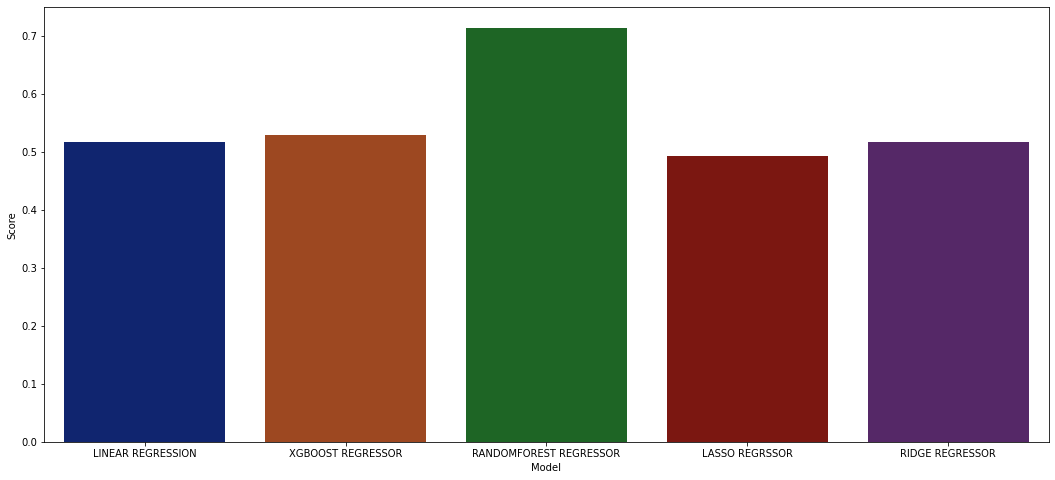

In [163]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'Model', y = 'Score', data = models, palette = 'dark')
plt.show()